# **Product Category Prediction for Flipkart Dataset using Naive Bayes**



# **Objective:**
1. Data Preparation: Cleaning and Analysing data
2. Visualize this Data
3. Preprocessing textual Data
4. Model Preparation for product categorization
5. Measure the accuracy of the model
6. Can we improve the accuracy of the model?
7. What other algorithms can we try?

Note:

LSTM Model was implemented first. And then, Naive Bayes was implemented to check whether it gives a comparable accuracy or not.


# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re

from string import punctuation
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import WordPunctTokenizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Data Analysis and Data Cleaning

In [2]:
df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/flipkart_com-ecommerce_sample - flipkart_com-ecommerce_sample - flipkart_com-ecommerce_sample.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

# View the data and analyze rows and columns

In [3]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


#  Get the Primary Categories

In [4]:
import re

#################################################################################################

# Extract the main category from product_category_tree column by specifying regex pattern. 
# If not found, split the sentence and get the first token after removing extra spaces and chars.

#################################################################################################

categories = df["product_category_tree"].copy()

for i in range(categories.shape[0]):
  z = re.match("(.*?)>",categories[i])  # splitting at '>'
  # print(categories[i])
  if z==None:
    categories[i] = categories[i].split()[0].strip('["]')
  else:
    z = z.group().strip('["]>')         # removing special characters
    categories[i]=z.strip()

print(categories)

0            Clothing
1           Furniture
2            Footwear
3            Clothing
4        Pet Supplies
             ...     
19995       Baby Care
19996       Baby Care
19997       Baby Care
19998       Baby Care
19999       Baby Care
Name: product_category_tree, Length: 20000, dtype: object


As we can observe, there are some categories with frequency of 4 samples or above:


1. Clovia (clothing)
2. Olvin (sunglasses)
3. Vishudh (clothing)
4. Dressberry (clothing)
5. Lilliput (baby care)
6. Speedwav (automotive)
7. MASARA (clothing)
8. Ruhi's (clothing)
9. Timberlake (clothing)
10. FEET (footwear)
11. Urban (beauty and personal care)



These are not valid primary categories (instead, they are Brand names) and actually belong to Clothing, Sunglasses, Baby Care, Automotive , Footwear and other categories (conclusion on the basis of careful inspection of data).

So, we should replace these labels with major primary category.

This will be our next step.

Note: We are not focusing on the left out labels (brand names) with frequency below 4 for now.

In [5]:
for i in range(categories.shape[0]):
  if (categories[i]=="Clovia" 
      or categories[i]=="Vishudh" 
      or categories[i]=="Dressberry" 
      or categories[i]=="MASARA" 
      or categories[i]=="Ruhi's" 
      or categories[i]=="TIMBERLAKE"):
    categories[i] = "Clothing"
  elif categories[i]=="Olvin":
    categories[i] = "Sunglasses"
  elif categories[i]=="Lilliput":
    categories[i] = "Baby Care"
  elif categories[i]=="Speedwav":
    categories[i] = "Automotive"
  elif categories[i]=="FEET":
    categories[i] = "Footwear"
  elif categories[i]=="Urban":
    categories[i] = "Beauty and Personal Care"

print("TOP 30 Valid Product Categories:\n\n",categories.value_counts()[:30])

df["product_category_tree"] = categories

TOP 30 Valid Product Categories:

 Clothing                             6247
Jewellery                            3531
Footwear                             1231
Mobiles & Accessories                1099
Automotive                           1019
Home Decor & Festive Needs            929
Beauty and Personal Care              714
Home Furnishing                       700
Kitchen & Dining                      647
Computers                             578
Watches                               530
Baby Care                             491
Tools & Hardware                      391
Toys & School Supplies                330
Pens & Stationery                     313
Bags, Wallets & Belts                 265
Furniture                             180
Sports & Fitness                      166
Cameras & Accessories                  82
Home Improvement                       81
Sunglasses                             56
Health & Personal Care Appliances      43
Gaming                                 35

# Data Visualization

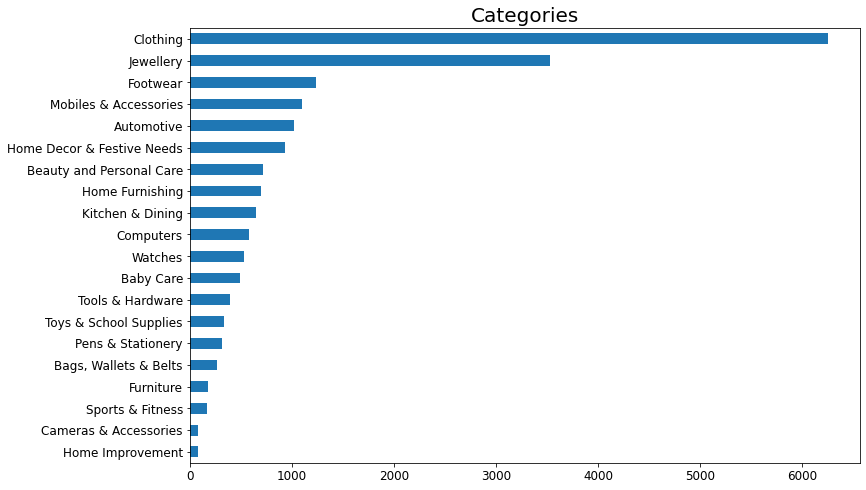

Top Categories: 

Clothing                             6247
Jewellery                            3531
Footwear                             1231
Mobiles & Accessories                1099
Automotive                           1019
Home Decor & Festive Needs            929
Beauty and Personal Care              714
Home Furnishing                       700
Kitchen & Dining                      647
Computers                             578
Watches                               530
Baby Care                             491
Tools & Hardware                      391
Toys & School Supplies                330
Pens & Stationery                     313
Bags, Wallets & Belts                 265
Furniture                             180
Sports & Fitness                      166
Cameras & Accessories                  82
Home Improvement                       81
Sunglasses                             56
Health & Personal Care Appliances      43
Gaming                                 35
Pet Supplies    

In [6]:
#####################################################################
# Plotting categories in descending order of their presence in dataset.
#####################################################################

plt.figure(figsize=(12,8))
df['product_category_tree'].value_counts()[:20].sort_values(ascending=True).plot(kind='barh')
plt.title('Categories',fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()
print('Top Categories: \n')
print(df['product_category_tree'].value_counts()[:30])



---



As we can observe, only top 28 categories are relevant and qualify as Product Categories.

So, we will classify descriptions for these 28 classes (categories)



---



In [7]:
top_categories = list(df.groupby('product_category_tree').count().sort_values(by='uniq_id',ascending=False).head(28).index)
# Taking only top 28 categories for final classification
df = df[df['product_category_tree'].isin(top_categories)][['description', 'product_category_tree']]

In [8]:
df.head()

,description,product_category_tree
0,Key Features of Alisha Solid Women's Cycling S...,Clothing
1,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,Furniture
2,Key Features of AW Bellies Sandals Wedges Heel...,Footwear
3,Key Features of Alisha Solid Women's Cycling S...,Clothing
4,Specifications of Sicons All Purpose Arnica Do...,Pet Supplies


# Pre-Processing Textual Data

We will perform few steps to get clean text:

1. Removing special characters
2. Removing Stopwords
3. Removing empty spaces
4. Lowercase conversion
5. Lemmatization (get words in raw form)
6. Stemming (to reduce vocab size and keep unique words only)
7. Tokenization (to get all words for vocab preparation)
8. Vectoization (to get vocabulary

In [9]:
from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()

def clean_text(description):
        # Remove all the special characters
        description = re.sub(r'\W', ' ', str(description))

        # remove all single characters
        description = re.sub(r'\s+[a-zA-Z]\s+', ' ', description)

        # Remove single characters from the start
        description = re.sub(r'\^[a-zA-Z]\s+', ' ', description)

        # Converting to Lowercase
        description = description.lower()

        # Lemmatization
        tokens = description.split()
        tokens = [stemmer.lemmatize(word) for word in tokens]
        tokens = [word for word in tokens if word not in en_stop]
        tokens = [word for word in tokens if len(word) > 3]

        preprocessed_text = ' '.join(tokens)
        
        return preprocessed_text


final_corpus = [clean_text(sentence) for sentence in df['description'] if str(sentence).strip() !='']

final_corpus


['feature alisha solid woman cycling short cotton lycra navy navy specification alisha solid woman cycling short short detail number content sale package pack fabric cotton lycra type cycling short general detail pattern solid ideal woman fabric care gentle machine wash lukewarm water bleach additional detail style code altht_3p_21 short',
 'fabhomedecor fabric double sofa finish color leatherette black mechanism type pull price fine deep seating experience save space click clack sofa easy fold vice versa simple click clack mechanism chrome mango wood frame long term durability double cushioned sofa provide extra softness make fine seating experience double easily sleep specification fabhomedecor fabric double sofa finish color leatherette black mechanism type pull installation demo installation demo detail installation demo product done free cost part purchase service partner visit location within business hour delivery product sofa general brand fabhomedecor mattress included deliver

In [10]:
# Visualize cleaned data

df['processed_description'] = pd.DataFrame(df['description'].astype('str').apply(clean_text))
df.head()

,description,product_category_tree,processed_description
0,Key Features of Alisha Solid Women's Cycling S...,Clothing,feature alisha solid woman cycling short cotto...
1,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,Furniture,fabhomedecor fabric double sofa finish color l...
2,Key Features of AW Bellies Sandals Wedges Heel...,Footwear,feature belly sandal wedge heel casuals belly ...
3,Key Features of Alisha Solid Women's Cycling S...,Clothing,feature alisha solid woman cycling short cotto...
4,Specifications of Sicons All Purpose Arnica Do...,Pet Supplies,specification sicons purpose arnica shampoo ge...


# Label Encoding to get Labels

In [11]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
category_encoded=le.fit_transform(df['product_category_tree'])
df['product_category_tree'] = category_encoded

# Data Splitting
(For Training and Testing Data)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(df['processed_description'],df["product_category_tree"],test_size=0.2, random_state=42)

## Multinomial NB with TFIDF Vectorizer:

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words = 'english')
# Removing stop words
x_train1 = vectorizer.fit_transform(x_train)
# Converting the train data

In [14]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
# Defining model

clf.fit(x_train1, y_train)
# Fitting to multinomial NB model 

print(clf.score(x_train1, y_train))
# Scoring the trained model 

x_test1 = vectorizer.transform(x_test) 
# Converting the test data

print (clf.score(x_test1, y_test))

0.868134649455834
0.8443825910931174




---


## Observation:
Training Accuracy:   86.81%

Test Accuracy:       84.43%


---






---


##	Multinomial NB with Count Vectorizer with ngram=(1,2)

In [16]:
cv = CountVectorizer(stop_words = 'english', ngram_range=(1,2))

X_train_matrix = cv.fit_transform(x_train) 

In [17]:
clf2 = MultinomialNB()
# Defining model

clf2.fit(X_train_matrix, y_train)
# Fitting to multinomial NB model 

print(clf2.score(X_train_matrix, y_train))
# Scoring the trained model

X_test_matrix = cv.transform(x_test) 
# Converting the test data

print (clf2.score(X_test_matrix, y_test))
# Scoring for the test data

predicted_result=clf2.predict(X_test_matrix)

print(classification_report(y_test,predicted_result))
# See Report for Precision, Recall and F1-score

0.9498228296633764
0.9134615384615384
              precision    recall  f1-score   support

           0       0.81      0.98      0.88       202
           1       0.96      0.58      0.73        89
           2       0.88      0.55      0.67        53
           3       0.96      0.90      0.93       142
           4       1.00      0.20      0.33        20
           5       0.97      1.00      0.99      1244
           6       0.92      0.60      0.73        98
           7       1.00      0.33      0.50         3
           8       1.00      0.93      0.96       268
           9       0.92      0.64      0.75        36
          10       1.00      0.57      0.73         7
          11       1.00      0.50      0.67        12
          12       0.00      0.00      0.00         3
          13       0.87      0.98      0.92       187
          14       0.00      0.00      0.00         7
          15       0.92      0.98      0.95       143
          16       1.00      0.28      0.43

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




---



## Observation:

Training Accuracy:   94.98%

Test Accuracy:         91.34%

Accuracy has improved.


---




## Multinomial NB with Count Vectorizer with ngram=(2,4):


In [18]:
cv = CountVectorizer(stop_words = 'english', ngram_range=(2,4))

X_train_matrix2 = cv.fit_transform(x_train)

In [19]:
clf3 = MultinomialNB()
# Defining model

clf3.fit(X_train_matrix2, y_train)
# Fitting to multinomial NB model 

print(clf3.score(X_train_matrix2, y_train))
# Scoring the trained model

X_test_matrix2 = cv.transform(x_test) 
# Converting the test data

print (clf3.score(X_test_matrix2, y_test))
# Scoring for the test data

predicted_result=clf3.predict(X_test_matrix2)

print(classification_report(y_test,predicted_result))
# See Report for Precision, Recall and F1-score

0.9446342698051127
0.8919534412955465
              precision    recall  f1-score   support

           0       0.72      0.95      0.82       202
           1       0.95      0.66      0.78        89
           2       0.89      0.58      0.70        53
           3       0.99      0.94      0.96       142
           4       0.83      0.25      0.38        20
           5       0.99      1.00      0.99      1244
           6       0.88      0.39      0.54        98
           7       1.00      1.00      1.00         3
           8       0.99      0.69      0.81       268
           9       0.88      0.64      0.74        36
          10       1.00      0.71      0.83         7
          11       1.00      0.67      0.80        12
          12       0.50      0.33      0.40         3
          13       0.93      0.99      0.96       187
          14       0.50      0.14      0.22         7
          15       0.85      0.97      0.90       143
          16       0.88      0.39      0.54



---

## Observation:
Training Accuracy:   94.46%

Test Accuracy:         89.19%

Test Accuracy has dropped. Not a good performance as compared to the previous one.


---







## 	Multinomial NB with Count Vectorizer with default ngram=(1,1) 

In [20]:
cv = CountVectorizer(stop_words = 'english')
# Removing stop words
X_train_matrix3 = cv.fit_transform(x_train) 

In [22]:
clf4 = MultinomialNB()
# Defining model

clf4.fit(X_train_matrix3, y_train)
# Fitting to multinomial NB model 

print(clf4.score(X_train_matrix3, y_train))
# Scoring the trained model 

X_test_matrix3 = cv.transform(x_test) 
# Converting the test data

print (clf4.score(X_test_matrix3, y_test))
# Scoring for the test data

predicted_result=clf4.predict(X_test_matrix3)

print(classification_report(y_test,predicted_result))
# See Report for Precision, Recall and F1-score

0.9476714755758036
0.9268724696356275
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       202
           1       0.89      0.62      0.73        89
           2       0.83      0.57      0.67        53
           3       0.85      0.92      0.89       142
           4       1.00      0.15      0.26        20
           5       0.98      0.99      0.99      1244
           6       0.80      0.81      0.80        98
           7       1.00      0.33      0.50         3
           8       0.99      0.98      0.98       268
           9       0.92      0.61      0.73        36
          10       1.00      0.57      0.73         7
          11       1.00      0.50      0.67        12
          12       0.00      0.00      0.00         3
          13       0.89      0.97      0.93       187
          14       0.00      0.00      0.00         7
          15       0.90      0.99      0.94       143
          16       1.00      0.39      0.56

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




---

## Observation:

Training Accuracy:   94.76%

Test Accuracy:         92.68%

Accuracy improved! Both Train and Test accuracies seem fine.

---



**View a prediction:**

In [23]:
le.inverse_transform(clf4.predict(cv.transform(['Key Features of SMART TRADERS Girls Bellies Occasion: Party Material: Artificial Leather Color: Gold Heel Height: 0,Specifications of SMART TRADERS Girls Bellies General Occasion Party Ideal For Girls Sandal Details Type Bellies Heel Height 0 inch Outer Material Artificial Leather Color GOLDEN'])))


array(['Footwear'], dtype=object)

# Plot Confusion Matrix

In [24]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

cnf_matrix = confusion_matrix(y_test, predicted_result)
print(cnf_matrix)

[[ 197    0    0    0    0    2    1    0    0    0    0    0    0    0
     0    0    0    1    0    0    0    0    0    0    0    0    1    0]
 [   2   55    0    0    0   15    0    0    0    0    0    0    0    4
     0   11    0    2    0    0    0    0    0    0    0    0    0    0]
 [   0    0   30    1    0    3    2    0    1    0    0    0    0    0
     0    0    0   13    0    1    0    0    2    0    0    0    0    0]
 [   1    0    0  131    0    0    0    0    0    0    0    0    0    2
     0    0    0    7    1    0    0    0    0    0    0    0    0    0]
 [   0    0    0    1    3    0    2    0    0    0    0    0    0    0
     0    0    0   13    0    1    0    0    0    0    0    0    0    0]
 [   1    3    2    2    0 1235    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    1    0    0    0    0    0]
 [   0    0    1    2    0    0   79    0    0    0    0    0    0    0
     0    0    0   11    0    5    0    0    0    0    0  

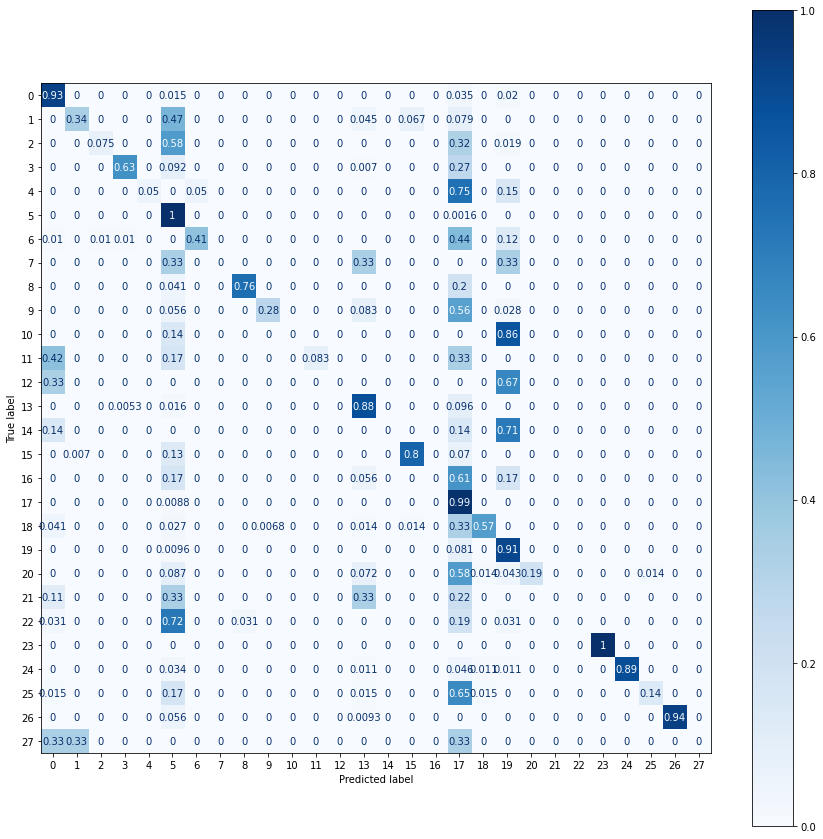

In [25]:
# Visualize

class_labels = np.arange(28)
fig, ax = plt.subplots(figsize=(15, 15))
plot_confusion_matrix(clf, X_test_matrix3, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.show()

# Conclusion:

As we can observe that the diagonal represents the percentage of correctly predicted labels. However, there are some mispredictions (False Positives and False Negatives) as well.

To increase the Accuracy, we can rely on LSTM model (which is given in the other Notebook along with code and analysis)